# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
for city in cities:
    city_name = city.replace(" ", "%20")

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
url
#print(requests.get(url))
units = "imperial"
city_no = []
temp = []
lat = []
long = []
humidity = []
cloud = []
wind = []
country = []
date_time = []
weather_json = []
weather_city = []
city_check = []
import time
page=0

#for a in cities:
    #b=a.replace(" ","%20")
    #city_check.append(b)

for city in cities:
    
    #while True:
        #query_url = f"{url}{city}&appid={weather_api_key}&units={units}"
        #weather_response = requests.get(query_url).json()
        #if weather_response.get('fault'):
            #print(weather_response,page)
            #time.sleep(100)
            #weather_response = requests.get(f"{query_url}&page={page}").json()
        
            #weather_city.extend(weather_response['main']['temp'])
            #page += 1
        #if len(weather_city) >= int(weather_response['main']['temp']):
            #break
    
    #len(weather_city) 
   
    query_url = f"{url}{city}&appid={weather_api_key}&units={units}"
    #print(query_url)
    weather_response = requests.get(query_url).json()
    try:
        weather_response["weather"]
    except KeyError:
        print(f'no {city} data is available')
        continue
    
    lat.append(weather_response['coord']['lat'])
    long.append(weather_response['coord']['lon'])
    temp.append(weather_response['main']['temp'])
    humidity.append(weather_response['main']['humidity'])
    cloud.append(weather_response['clouds']['all'])
    wind.append(weather_response['wind']['speed'])
    country.append(weather_response['sys']['country'])
    date_time.append(weather_response['dt'])
    weather_city.append(city)

    print(f'Name: {weather_response["name"]} ID: {weather_response["id"]}')
        

no taolanaro data is available
Name: Oloron-Sainte-Marie ID: 2989569
Name: Ambulu ID: 1621313
Name: Port Elizabeth ID: 964420
Name: Saint-Philippe ID: 935215
Name: Kontagora ID: 2334008
Name: Punta Arenas ID: 3874787
Name: Luga ID: 533690
Name: Kapaa ID: 5848280
Name: Kaitangata ID: 2208248
Name: Nehe ID: 2035610
Name: Ushuaia ID: 3833367
Name: Itarana ID: 3460623
Name: Arraial do Cabo ID: 3471451
Name: Tasiilaq ID: 3424607
Name: Ţahţā ID: 347634
Name: Khatanga ID: 2022572
Name: Tongzi ID: 1799686
Name: Castro ID: 3466704
Name: Siteki ID: 934851
Name: Oranjemund ID: 3354071
Name: Awjilah ID: 88533
Name: San Ramon ID: 5392593
Name: Albany ID: 5106841
Name: Sawākin ID: 367544
Name: Alofi ID: 4036284
Name: Khadro ID: 1174408
Name: Mataura ID: 6201424
Name: Baykit ID: 1510689
no sentyabrskiy data is available
Name: Porto-Novo ID: 2392087
no grand river south east data is available
no attawapiskat data is available
Name: Busselton ID: 2075265
Name: Vaini ID: 4032243
Name: Tuktoyaktuk ID: 61

In [4]:
#for city in city_check:

        #lat.append(weather_json['coord']['lat'])
        #temp.append(weather_json['main']['temp'])
        #humidity.append(weather_json['main']['humidity'])
        #cloud.append(weather_json['clouds']['all'])
        #wind.append(weather_json['wind']['speed'])
        #weather_city.append(city)

        #print(f'not enough data for {city}.')


In [5]:
weather_dict = {
    "city": weather_city,
    "lat": lat,
    "long": long,
    "temp": temp,
    "humidity": humidity,
    "cloud": cloud,
    "wind": wind,
    "country":country,
    "date and time":date_time
}



In [6]:
print(len(weather_city))
print(len(lat))
print(len(temp))
print(len(humidity))
print(len(cloud))
print(len(wind))

563
563
563
563
563
563


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_data_df = pd.DataFrame(data=weather_dict)

weather_data_df.to_csv('output.csv', index=False)
weather_data_df

,city,lat,long,temp,humidity,cloud,wind,country,date and time
0,oloron-sainte-marie,43.1944,-0.6107,49.14,71,90,6.91,FR,1615044880
1,ambulu,-8.3450,113.6058,76.50,86,99,3.22,ID,1615044881
2,port elizabeth,-33.9180,25.5701,75.20,69,0,17.27,ZA,1615044693
3,saint-philippe,-21.3585,55.7679,77.00,89,75,3.44,RE,1615044690
4,kontagora,10.3999,5.4695,102.40,8,83,5.19,NG,1615044881
...,...,...,...,...,...,...,...,...,...
558,plesetsk,62.7080,40.2916,11.68,97,99,6.96,RU,1615044995
559,cervo,43.6702,-7.4101,51.01,79,52,3.00,ES,1615044995
560,kavaratti,10.5669,72.6420,82.69,67,100,9.57,IN,1615044996
561,ulladulla,-35.3500,150.4667,58.19,82,90,2.21,AU,1615044731


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_data_df.loc[weather_data_df['humidity']>100]

#fig1, ax1 = plt.subplots()
#ax1.set_title('City')
#ax1.set_ylabel('Humidity')
#ax1.boxplot(humidity)
#plt.show()

,city,lat,long,temp,humidity,cloud,wind,country,date and time


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

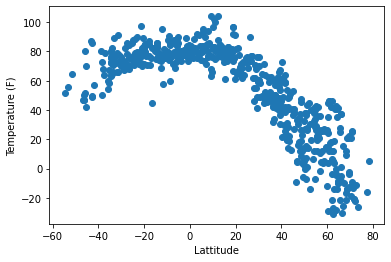

In [11]:
import scipy.stats as st
plt.scatter(lat,temp)
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')

plt.show()

## Latitude vs. Humidity Plot

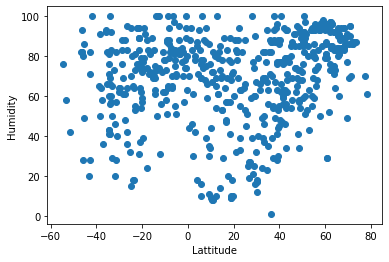

In [12]:
plt.scatter(lat,humidity)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')

plt.show()

## Latitude vs. Cloudiness Plot

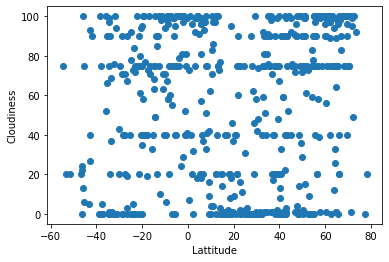

In [13]:
plt.scatter(lat, cloud)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')

plt.show()

## Latitude vs. Wind Speed Plot

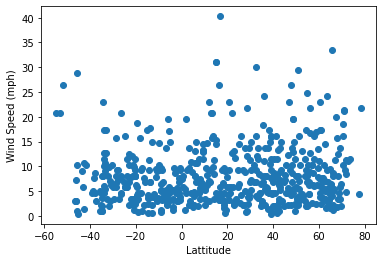

In [14]:
plt.scatter(lat,wind)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

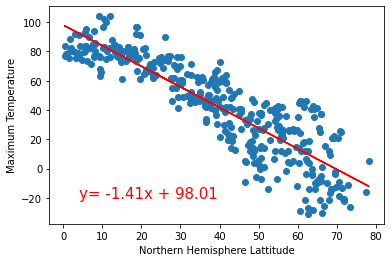

In [15]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Maximum Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

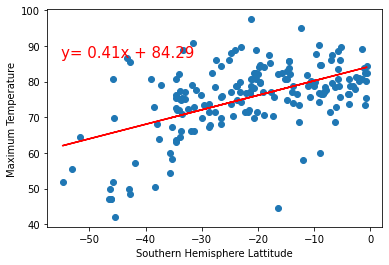

In [16]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,87),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Maximum Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

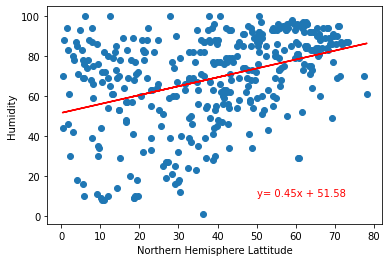

In [17]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

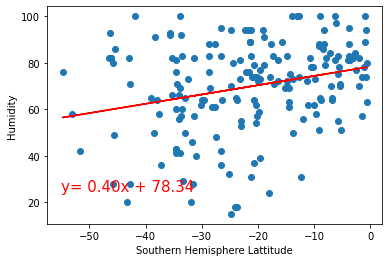

In [18]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

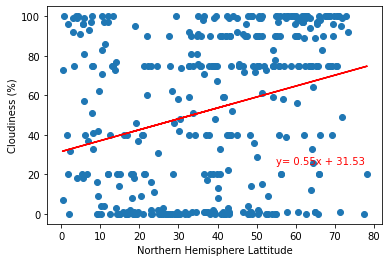

In [19]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55, 25),fontsize=10,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

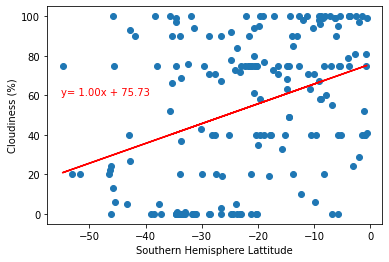

In [20]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=10,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

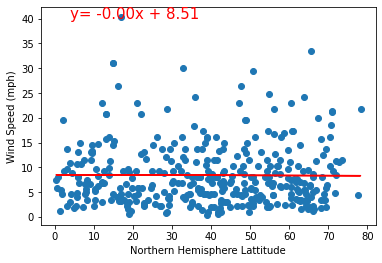

In [21]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,40),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

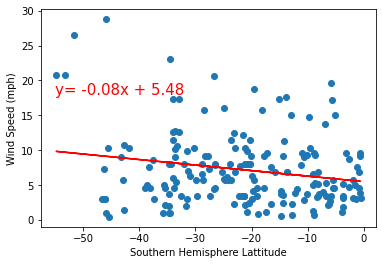

In [22]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.show()